In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

Step 1: Data Loading and Initial Inspection

# Load the dataset

In [3]:
retail_data = pd.read_csv("Online Retail_1.csv", encoding='ISO-8859-1')

In [4]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


# Check basic dataset info

In [5]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Step 2: Data Cleaning

# Check for missing values


In [7]:
print(retail_data.isnull().sum())


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


# Remove rows with missing values if necessary or impute them

# Remove duplicates


In [8]:
retail_data = retail_data.drop_duplicates()

Step 3: Basic Statistics

What is the overall sales revenue represented by this dataset?

In [11]:
retail_data["Total_revenue"] = retail_data["Quantity"] * retail_data["UnitPrice"]
overal_revenue = retail_data["Total_revenue"].sum()
print(overal_revenue)

9726006.953999998


C:\Users\My PC\AppData\Local\Temp\ipykernel_11592\2359610604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data["Total_revenue"] = retail_data["Quantity"] * retail_data["UnitPrice"]


What is the distribution of Quantity and UnitPrice?

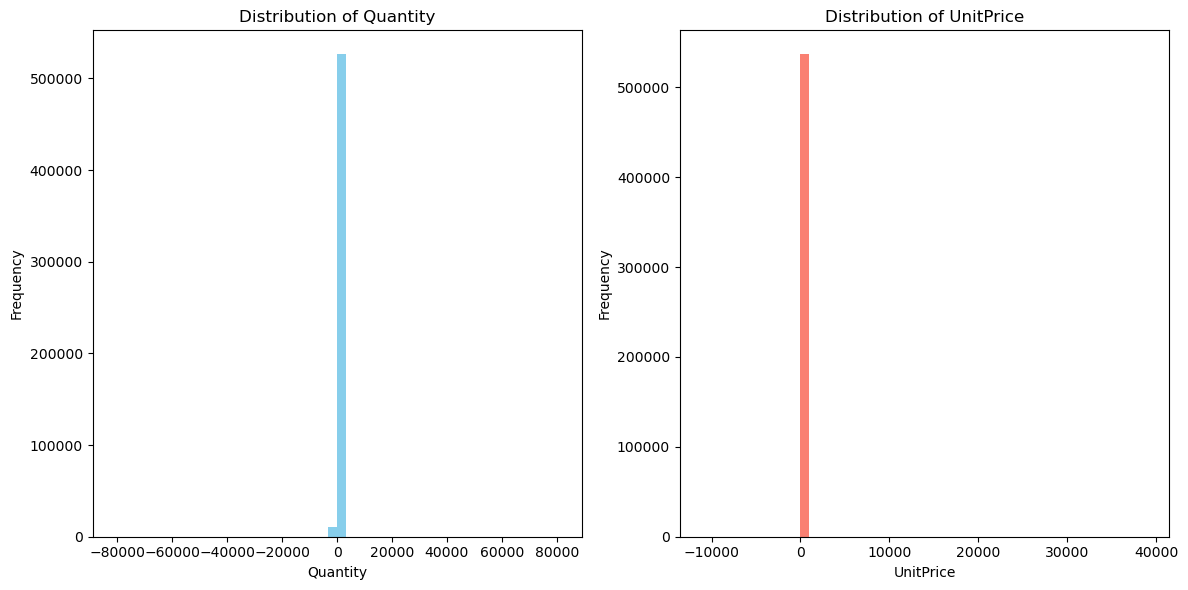

In [23]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(retail_data['Quantity'], bins=50, color='skyblue')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')

plt.subplot(1, 2, 2)
plt.hist(retail_data['UnitPrice'], bins=50, color='salmon')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.title('Distribution of UnitPrice')

plt.tight_layout()
plt.show()

What is the average Quantity and UnitPrice per product (StockCode)?

In [26]:
average_stockcode= retail_data.groupby('StockCode')[['Quantity' , 'UnitPrice']].mean()
print(average_stockcode)

               Quantity  UnitPrice
StockCode                         
10002         14.205479   1.056849
10080         20.625000   0.376667
10120          6.620690   0.210000
10123C        -3.250000   0.487500
10123G       -38.000000   0.000000
...                 ...        ...
gift_0001_20   2.000000  15.038000
gift_0001_30   4.625000  21.941250
gift_0001_40   1.000000  33.566667
gift_0001_50   1.000000  41.890000
m              1.000000   2.550000

[4070 rows x 2 columns]


What is the average UnitPrice per country?

In [28]:
average_price_perunit = retail_data.groupby('Country')[['Quantity' , 'UnitPrice']].mean()
print(average_price_perunit)

                       Quantity   UnitPrice
Country                                    
Australia             66.488871    3.217806
Austria               12.037406    4.243192
Bahrain               13.684211    4.556316
Belgium               11.189947    3.644335
Brazil                11.125000    4.456250
Canada                18.298013    6.030331
Channel Islands       12.513871    4.936460
Cyprus                10.304419    6.350311
Czech Republic        19.733333    2.938333
Denmark               21.048843    3.256941
EIRE                  17.411413    5.914024
European Community     8.147541    4.820492
Finland               15.346763    5.448705
France                12.930336    5.032898
Germany               12.377743    3.969772
Greece                10.657534    4.885548
Hong Kong             16.580986   43.043662
Iceland               13.505495    2.644011
Israel                14.795918    3.650306
Italy                  9.961395    4.831121
Japan                 70.441341 

How many unique customers are there in the dataset?

In [30]:
unique_customers = retail_data['CustomerID'].nunique()
print(unique_customers)

4372


Time Series Analysis:

What is the distribution of invoices over time? Are there any seasonal patterns?


What is the busiest month/day of the week for sales?

In [31]:
# Convert InvoiceDate to a datetime object
retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate'])

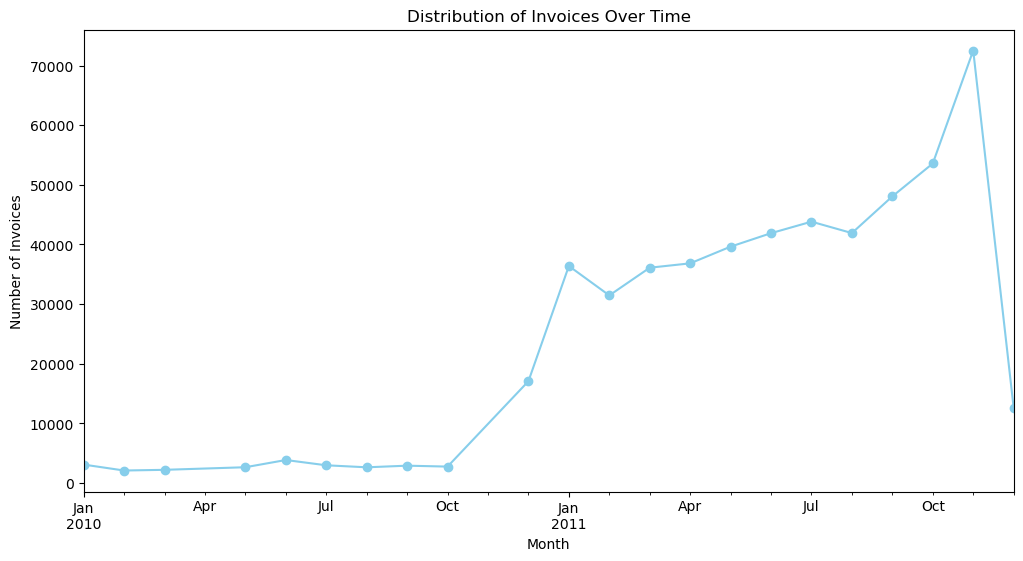

In [32]:
# Group the data by month and count the number of invoices in each month
monthly_invoices = retail_data.groupby(retail_data['InvoiceDate'].dt.to_period('M')).size()

# Plot the distribution of invoices over time
plt.figure(figsize=(12, 6))
monthly_invoices.plot(kind='line', marker='o', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Invoices')
plt.title('Distribution of Invoices Over Time')
plt.show()

In [33]:
# Extract the month and day of the week from the InvoiceDate
retail_data['Month'] = retail_data['InvoiceDate'].dt.month
retail_data['DayOfWeek'] = retail_data['InvoiceDate'].dt.dayofweek

# Find the busiest month for sales
busiest_month = retail_data['Month'].value_counts().idxmax()

# Find the busiest day of the week for sales
busiest_day_of_week = retail_data['DayOfWeek'].value_counts().idxmax()

# Convert the day of the week index to a day name (0 = Monday, 6 = Sunday)
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
busiest_day_of_week = days_of_week[busiest_day_of_week]

print(f'Busiest Month for Sales: {busiest_month}')
print(f'Busiest Day of the Week for Sales: {busiest_day_of_week}')

Busiest Month for Sales: 11
Busiest Day of the Week for Sales: Thursday


Customer Analysis:

Who are the top customers in terms of total spending?


What are the most popular products (StockCode) purchased by customers?


How does customer spending vary by country?

In [35]:
# Calculate total spending for each customer
retail_data['TotalSpending'] = retail_data['Quantity'] * retail_data['UnitPrice']
customer_spending = retail_data.groupby('CustomerID')['TotalSpending'].sum()

# Find the top customers by total spending
top_customers = customer_spending.sort_values(ascending=False).head(10)
print("Top Customers by Total Spending:")
print(top_customers)

Top Customers by Total Spending:
CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187322.17
14911.0    132458.73
12415.0    123725.45
14156.0    113214.59
17511.0     88125.38
16684.0     65892.08
13694.0     62690.54
15311.0     59284.19
Name: TotalSpending, dtype: float64


In [36]:
# Group the data by StockCode and count the number of times each product was purchased
popular_products = retail_data.groupby('StockCode')['Quantity'].sum()

# Find the most popular products by quantity purchased
most_popular_products = popular_products.sort_values(ascending=False).head(10)
print("Most Popular Products (StockCode) Purchased by Customers:")
print(most_popular_products)

Most Popular Products (StockCode) Purchased by Customers:
StockCode
22197     56427
84077     53751
85099B    47260
85123A    38811
84879     36122
21212     36016
23084     30597
22492     26437
22616     26299
21977     24719
Name: Quantity, dtype: int64


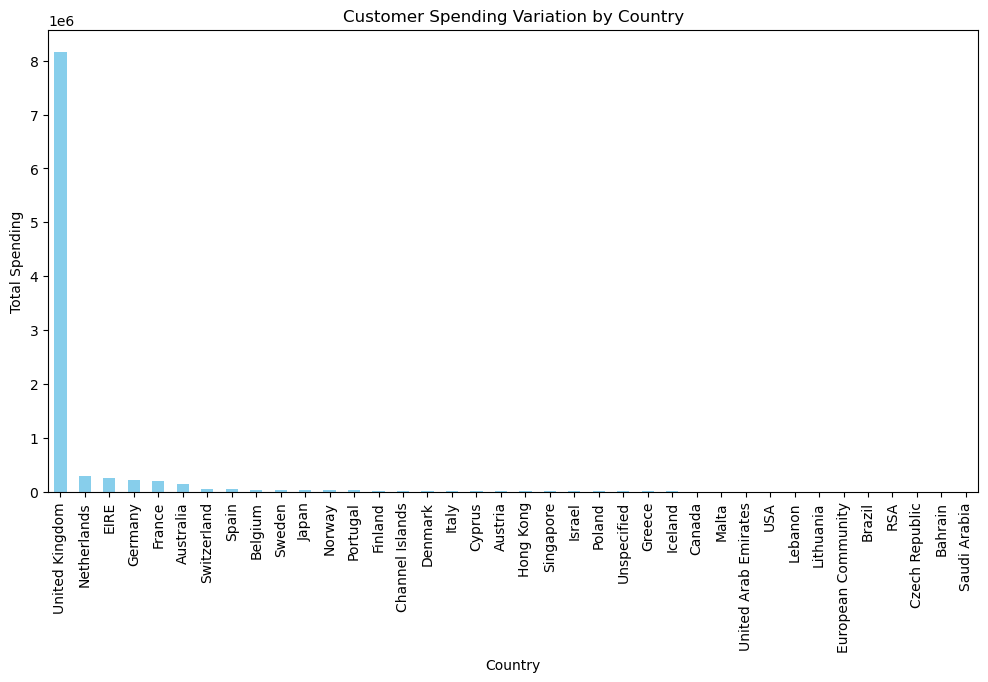

In [37]:
# Group the data by Country and calculate the total spending for each country
country_spending = retail_data.groupby('Country')['TotalSpending'].sum()

# Plot a bar chart to visualize customer spending by country
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
country_spending.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Spending')
plt.title('Customer Spending Variation by Country')
plt.show()

Product Analysis:

What are the most and least expensive products?


What products have the highest and lowest sales quantities?

In [39]:
 #Calculate the total price for each product
retail_data['TotalPrice'] = retail_data['Quantity'] * retail_data['UnitPrice']

# Find the most expensive product
most_expensive_product = retail_data.loc[retail_data['UnitPrice'].idxmax()]

# Find the least expensive product
least_expensive_product = retail_data.loc[retail_data['UnitPrice'].idxmin()]

print("Most Expensive Product:")
print(most_expensive_product[['StockCode', 'Description', 'UnitPrice']])
print("\nLeast Expensive Product:")
print(least_expensive_product[['StockCode', 'Description', 'UnitPrice']])

Most Expensive Product:
StockCode            M
Description     Manual
UnitPrice      38970.0
Name: 222681, dtype: object

Least Expensive Product:
StockCode                    B
Description    Adjust bad debt
UnitPrice            -11062.06
Name: 299983, dtype: object


In [40]:
# Group the data by StockCode and calculate the total sales quantity for each product
product_sales_quantity = retail_data.groupby('StockCode')['Quantity'].sum()

# Find the product with the highest sales quantity
highest_sales_quantity_product = product_sales_quantity.idxmax()

# Find the product with the lowest sales quantity
lowest_sales_quantity_product = product_sales_quantity.idxmin()

print("Product with Highest Sales Quantity:")
print(highest_sales_quantity_product)
print("\nProduct with Lowest Sales Quantity:")
print(lowest_sales_quantity_product)

Product with Highest Sales Quantity:
22197

Product with Lowest Sales Quantity:
23005


Country Analysis:

Which countries have the highest and lowest sales revenue?


How do sales quantities vary by country?

In [45]:
# Group the data by Country and calculate the total sales revenue for each country
country_sales_revenue = retail_data.groupby('Country')['TotalPrice'].sum()

# Find the country with the highest sales revenue
highest_sales_country = country_sales_revenue.idxmax()

# Find the country with the lowest sales revenue
lowest_sales_country = country_sales_revenue.idxmin()

print("Country with Highest Sales Revenue:")
print(highest_sales_country)
print("\nCountry with Lowest Sales Revenue:")
print(lowest_sales_country)
#This code calculates the total sales revenue for each country and then identifies the countries with the highest and lowest sales revenue.


Country with Highest Sales Revenue:
United Kingdom

Country with Lowest Sales Revenue:
Saudi Arabia


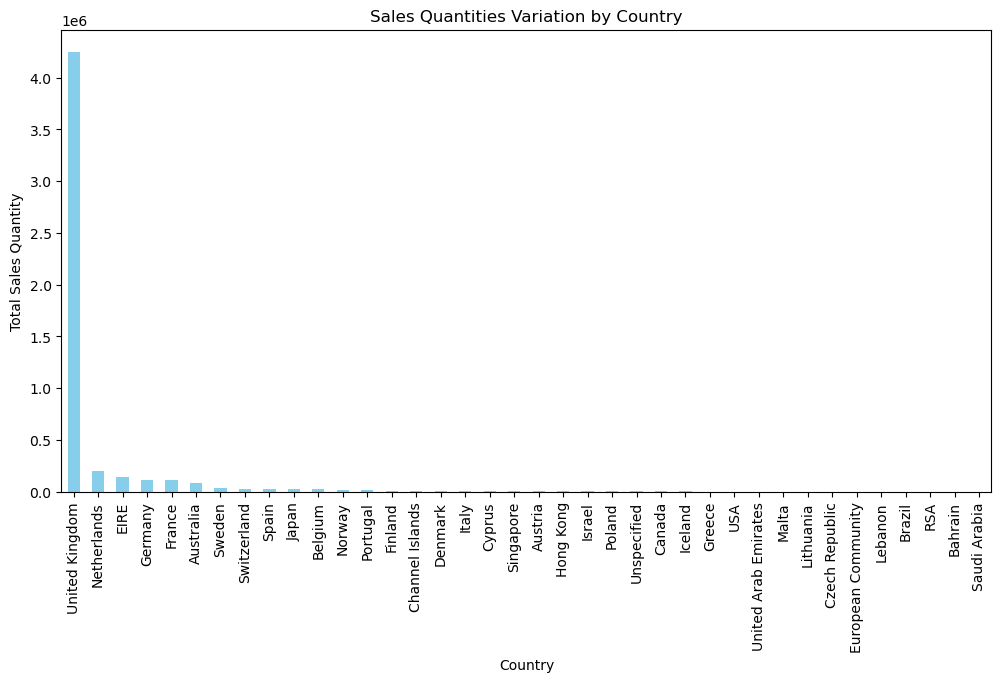

In [46]:
#Sales Quantities Variation by Country:

# Group the data by Country and calculate the total sales quantity for each country
country_sales_quantity = retail_data.groupby('Country')['Quantity'].sum()

# Plot a bar chart to visualize sales quantities by country
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
country_sales_quantity.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Sales Quantity')
plt.title('Sales Quantities Variation by Country')
plt.show()

Correlations and Relationships:

Is there a correlation between the Quantity and UnitPrice?


Is there a correlation between the CustomerID and spending?



In [50]:
# Calculate the correlation between Quantity and UnitPrice
correlation_quantity_price = retail_data['Quantity'].corr(retail_data['UnitPrice'])

print(f"Correlation between Quantity and UnitPrice: {correlation_quantity_price:.2f}")

Correlation between Quantity and UnitPrice: -0.00


In [48]:
# Calculate the correlation between CustomerID and TotalSpending
correlation_customer_spending = retail_data['CustomerID'].corr(retail_data['TotalSpending'])

print(f"Correlation between CustomerID and Spending: {correlation_customer_spending:.2f}")


Correlation between CustomerID and Spending: -0.00


Visualization:

Create histograms, box plots, and scatter plots to visualize data distributions and relationships.


Plot time series charts to visualize sales trends over time.


Create a geographical map to visualize sales by country.

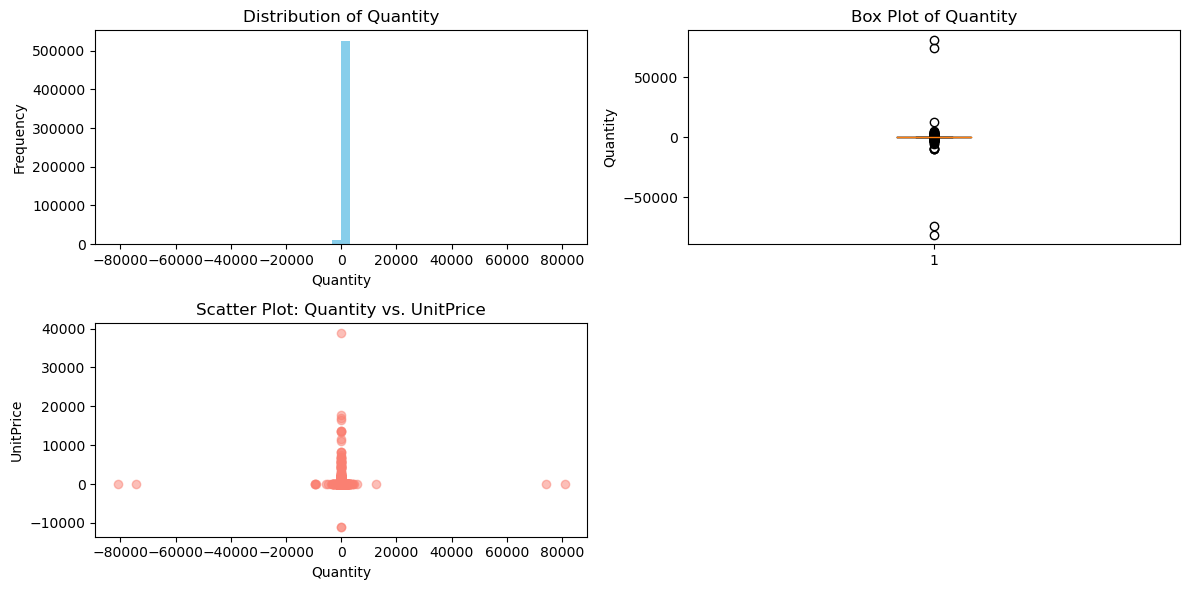

In [51]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(retail_data['Quantity'], bins=50, color='skyblue')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')

# Box plots
plt.subplot(2, 2, 2)
plt.boxplot(retail_data['Quantity'])
plt.ylabel('Quantity')
plt.title('Box Plot of Quantity')

# Scatter plot
plt.subplot(2, 2, 3)
plt.scatter(retail_data['Quantity'], retail_data['UnitPrice'], alpha=0.5, color='salmon')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('Scatter Plot: Quantity vs. UnitPrice')

plt.tight_layout()
plt.show()